In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv(r'C:\Users\dhrit\projects\Fraud demo1\fraudTrain.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
data.dataframeName = 'fraudTest.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1296675 rows and 23 columns


In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
print('Number of fraudulent transactions =',len(data[data.is_fraud==1]))
print('Number of fraudulent transactions per 100000 transactions =', len(data[data.is_fraud==1])/len(data)*100000)


Number of fraudulent transactions = 7506
Number of fraudulent transactions per 100000 transactions = 578.8651743883394


<ipython-input-4-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-4-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


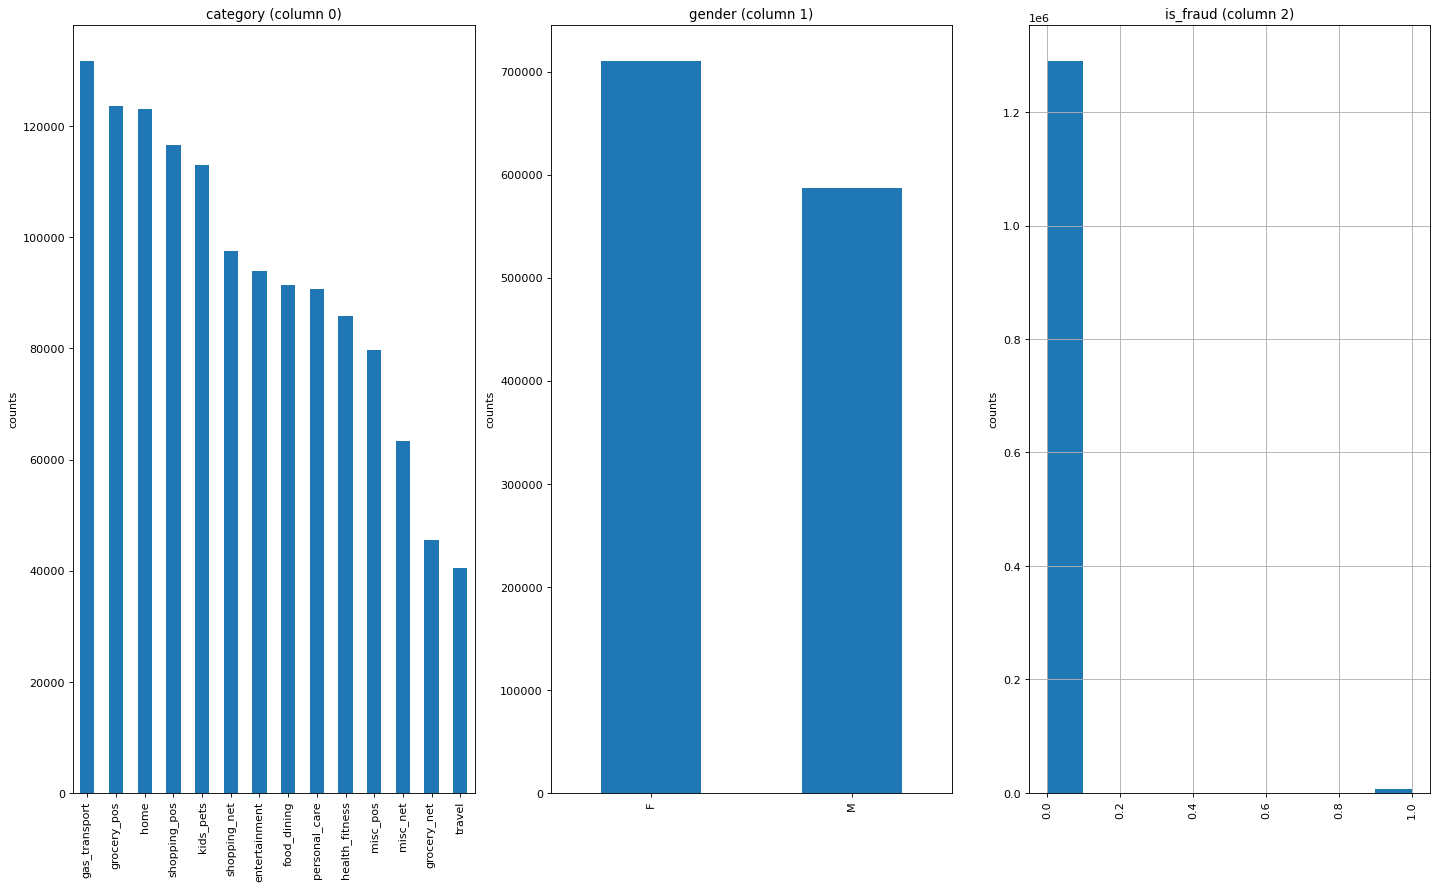

In [6]:
plotPerColumnDistribution(data, 10, 5)

In [7]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

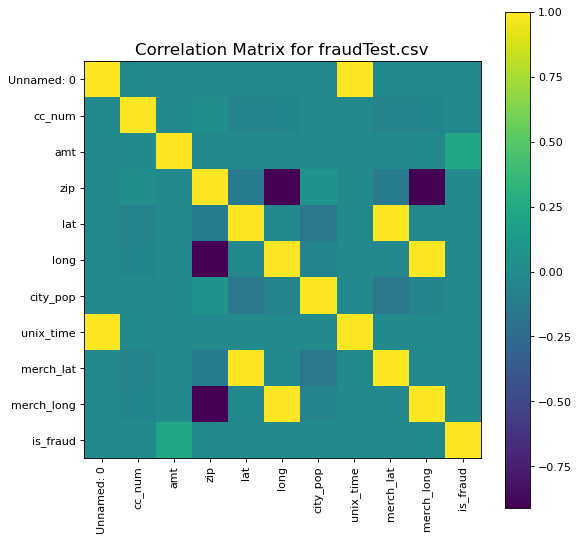

In [8]:
plotCorrelationMatrix(data, 8)

In [23]:
# split dataset for further processing
fraud = data[data['is_fraud']==1]
non_fraud = data[data['is_fraud']==0]
fraud.shape,non_fraud.shape

((7506, 23), (1289169, 23))

In [10]:
#Finding unique values in each column
data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [11]:
data.isnull().sum().sum()

0

In [12]:
data.shape

(1296675, 23)

In [13]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [14]:
data["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

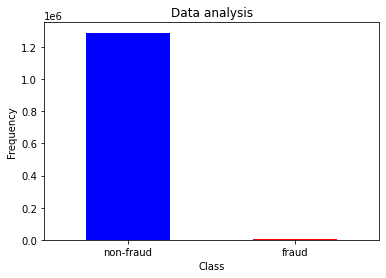

In [15]:
class_name = ["non-fraud", "fraud"]
class_count = pd.value_counts(data["is_fraud"], sort=True)
class_count.plot(kind="bar", rot=0, color=["blue", "red"])
plt.xticks(range(2), class_name)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data analysis")
plt.show()

In [16]:
non_fraud_data=data[data['is_fraud']==0]
fraud_data=data[data['is_fraud']==1]

print("Fraud Data Shape: ", fraud_data.shape)
print("Non-Fraud Data Shape: ", non_fraud_data.shape)

Fraud Data Shape:  (7506, 23)
Non-Fraud Data Shape:  (1289169, 23)


In [24]:
pd.concat([fraud.amt.describe(), non_fraud.amt.describe()], axis=1)

,amt,amt
count,7506.000000,1.289169e+06
mean,531.320092,6.766711e+01
std,390.560070,1.540080e+02
min,1.060000,1.000000e+00
25%,245.662500,9.610000e+00
50%,396.505000,4.728000e+01
75%,900.875000,8.254000e+01
max,1376.040000,2.894890e+04


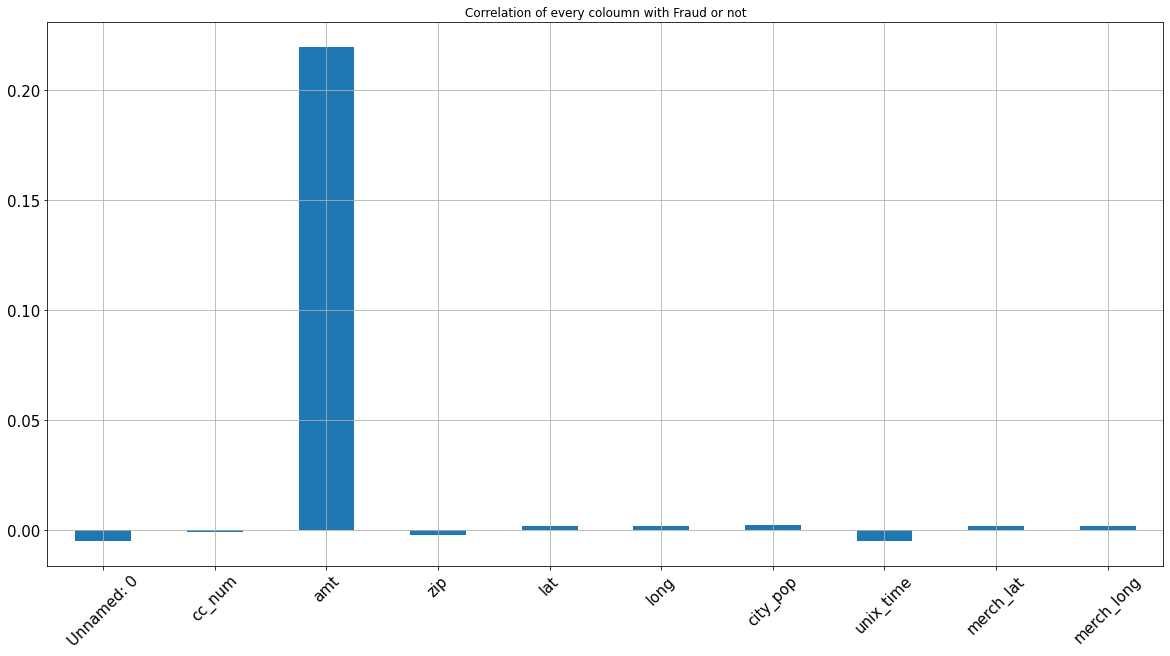

In [25]:
data2 = data.drop(columns = ['is_fraud']) 
data2.corrwith(data.is_fraud).plot.bar(
    figsize=(20,10),title="Correlation of every coloumn with Fraud or not",fontsize=15,
    rot=45,grid=True)
plt.show()

In [21]:
## amount vs is_fraud

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(0.0, 0.1)

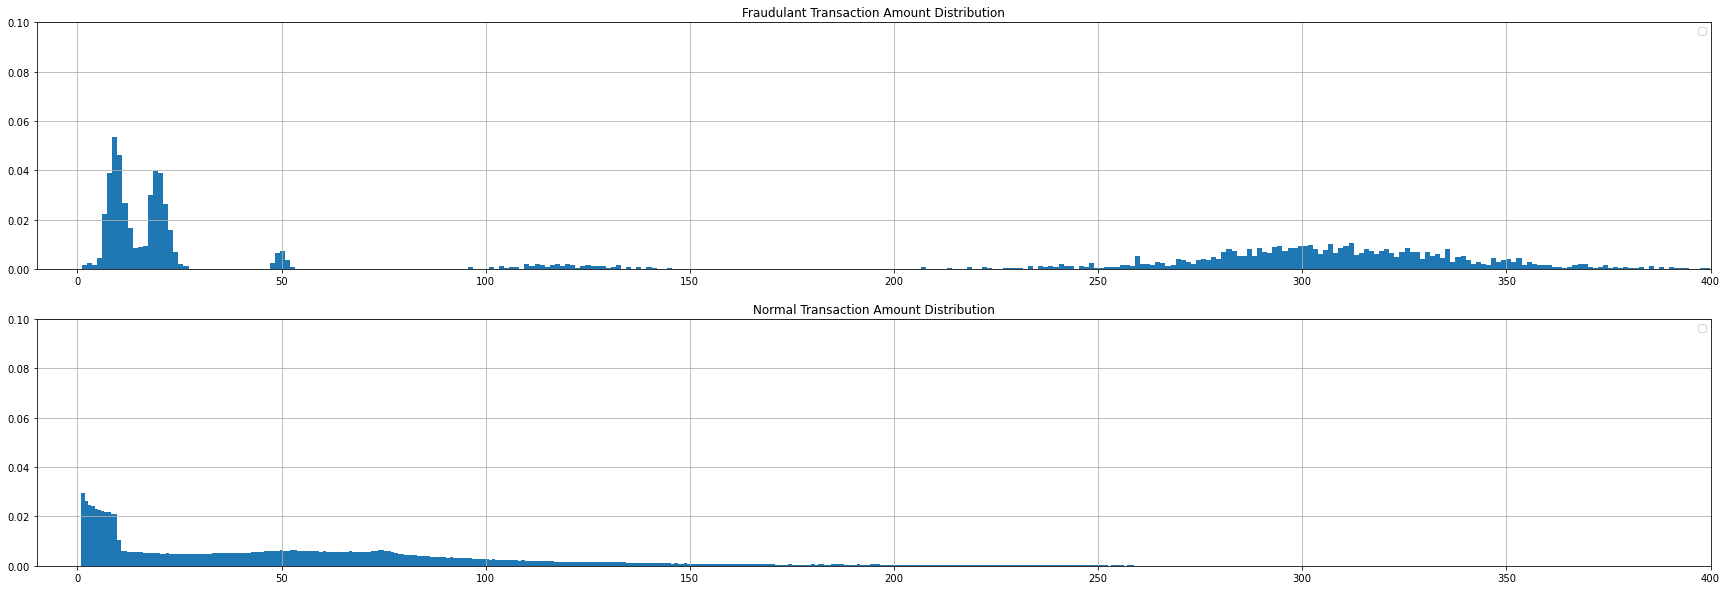

In [26]:
plt.figure(figsize=(30, 10))

print()
plt.subplot(2, 1, 1)
subfraud = fraud[fraud.amt<500]
subfraud.amt.hist(bins=400,weights=np.ones(len(subfraud.amt)) / len(subfraud.amt))
plt.title("Fraudulant Transaction Amount Distribution")
plt.legend()
plt.xlim([-10,400])
plt.ylim([0,0.1])

plt.subplot(2, 1, 2)
subnormal = non_fraud[non_fraud.amt<400]
subnormal.amt.hist(bins=500, weights=np.ones(len(subnormal.amt)) / len(subnormal.amt))
plt.title("Normal Transaction Amount Distribution")
plt.legend()
plt.xlim([-10,400])
plt.ylim([0,0.1])

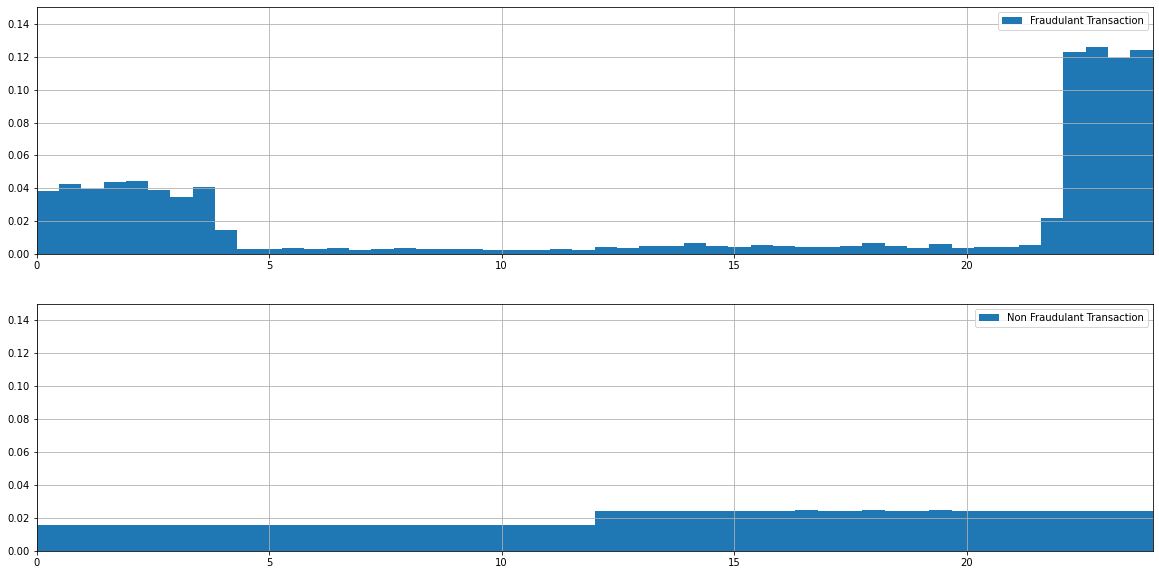

In [28]:
#time vs is_fraud
# plot hist 
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
fraud_24time = fraud.copy()
fraud_24time.unix_time = fraud_24time.unix_time % 86400 #(86400s per 24h)
fraud_24time.unix_time /= (86400/24)
fraud_24time.unix_time.hist(bins=50,label="Fraudulant Transaction",weights=np.ones(len(fraud_24time)) / len(fraud_24time))
plt.xlim([0,24])
plt.ylim([0,0.15])
plt.xlabel("")
plt.legend()

plt.subplot(2, 1, 2)
normal_24time = non_fraud.copy()
normal_24time.unix_time  = normal_24time.unix_time  % 86400 #(86400s per 24h)
normal_24time.unix_time  /= (86400/24)
normal_24time.unix_time .hist(bins=50,label="Non Fraudulant Transaction",weights=np.ones(len(normal_24time)) / len(normal_24time))
plt.xlim([0,24])
plt.ylim([0,0.15])
plt.legend()

In [197]:
##observations 
#1. no null data 
#2. need to convert categorical data into numeric
#3. Amt has high correlation with is_fraud
#4. Probability of fraud is high during certain time-interval(22-4am)

In [29]:
# Checking Null values
pd.DataFrame(data.isnull().value_counts())


,,,,,,,,,,,,,,,,,,,,,,,0
Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1296675


In [30]:
# Converting from character to integer
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
data['gender'] = data['gender'].transform(gender_binarizer)

In [31]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [201]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                     int64
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [32]:
data1 = data.loc[:99999,data.dtypes!=np.object]
data1

,Unnamed: 0,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,1,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,1,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,0,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,0,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,0,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2475085306462014,95.14,0,56152,44.2378,-95.2739,1507,1330443409,44.718105,-95.843397,0
99996,99996,4005676619255478,8.75,0,70726,30.4590,-90.9027,71335,1330443447,29.931844,-90.610715,0
99997,99997,3519232971341141,34.20,0,43903,40.4731,-80.9596,2208,1330443454,41.076153,-80.506107,0
99998,99998,4040099974063068803,73.11,0,58769,48.3396,-102.2400,229,1330443491,48.535070,-102.524262,0


In [34]:
#Converting data type of trans_date_trans_time to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [35]:
#Derive 'Transaction Hour' Feature from 'Transaction Time' Feature
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int64

In [36]:
#Derive 'Day of Week' Feature from 'Transaction Time' Feature
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()
data['day_of_week']


0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_of_week, Length: 1296675, dtype: object

In [37]:
#Derive 'Year Month' Feature from 'Transaction Time' Feature
data['year_month'] = data['trans_date_trans_time'].dt.to_period('M')
data['year_month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1296670    2020-06
1296671    2020-06
1296672    2020-06
1296673    2020-06
1296674    2020-06
Name: year_month, Length: 1296675, dtype: period[M]

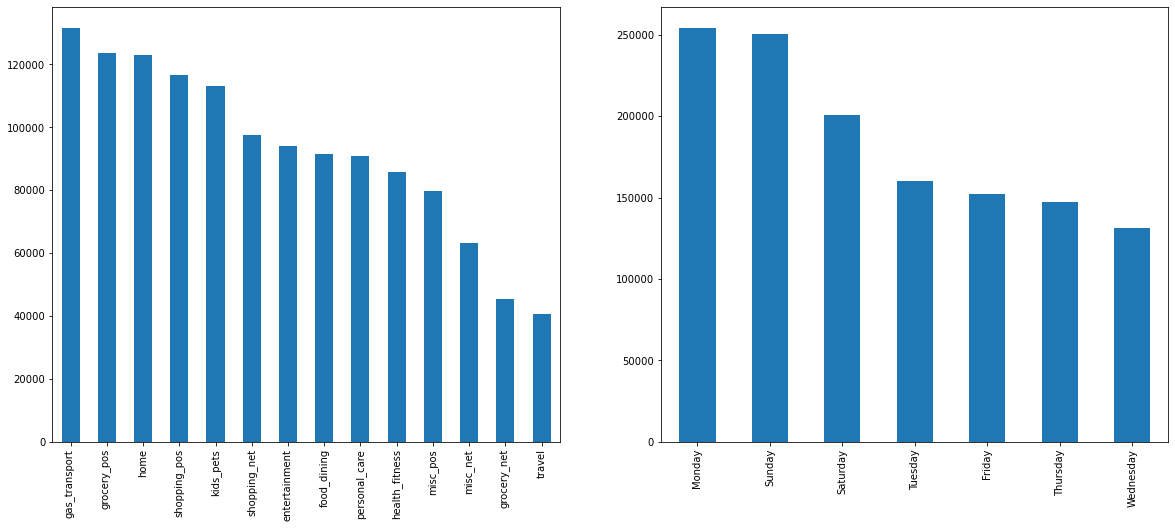

In [38]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
data['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
data['day_of_week'].value_counts().plot.bar();

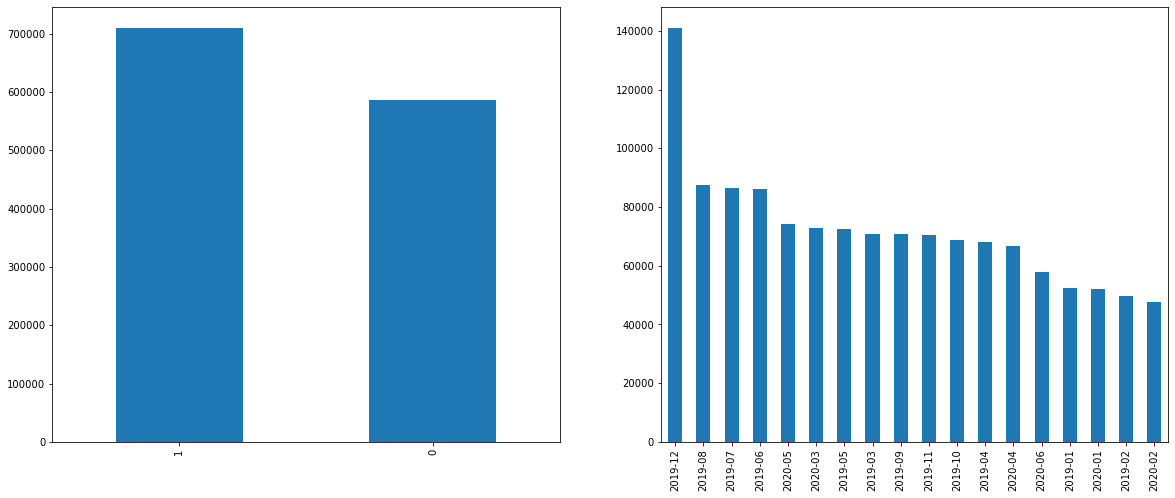

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
data['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
data['year_month'].value_counts().plot.bar();

In [40]:
data.state.value_counts(normalize=True)

TX    0.073169
NY    0.064396
PA    0.061578
CA    0.043465
OH    0.035846
MI    0.035594
IL    0.033356
FL    0.032908
AL    0.031611
MO    0.029617
MN    0.024458
AR    0.024005
NC    0.023341
WI    0.022649
VA    0.022558
SC    0.022511
KY    0.021960
IN    0.021270
IA    0.020811
OK    0.020569
MD    0.020200
GA    0.020100
WV    0.019813
NJ    0.018974
NE    0.018638
KS    0.017735
MS    0.016340
LA    0.016168
WY    0.014901
WA    0.014594
OR    0.014342
TN    0.013538
ME    0.012729
NM    0.012653
ND    0.011403
CO    0.010704
MA    0.009544
SD    0.009504
VT    0.009076
MT    0.009065
AZ    0.008306
UT    0.008251
NH    0.006384
CT    0.005940
NV    0.004324
ID    0.004276
DC    0.002786
HI    0.001974
AK    0.001635
RI    0.000424
DE    0.000007
Name: state, dtype: float64

In [41]:
data.job.value_counts(normalize=True,ascending=False)

Film/video editor                 0.007542
Exhibition designer               0.007094
Naval architect                   0.006697
Surveyor, land/geomatics          0.006694
Materials engineer                0.006378
                                    ...   
Armed forces technical officer    0.000006
Information officer               0.000006
Warehouse manager                 0.000005
Ship broker                       0.000005
Contracting civil engineer        0.000005
Name: job, Length: 494, dtype: float64

In [42]:
#Derive Age of the Customer:
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = np.round((data['trans_date_trans_time'] - data['dob'])/np.timedelta64(1,'Y'))
data['age']


0          31.0
1          41.0
2          57.0
3          52.0
4          33.0
           ... 
1296670    59.0
1296671    41.0
1296672    53.0
1296673    40.0
1296674    25.0
Name: age, Length: 1296675, dtype: float64

In [43]:
data['age'].describe()

count    1.296675e+06
mean     4.599986e+01
std      1.739626e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

In [44]:
## observations 
##33-57 age people are 50% of our customers
##Minimum age of customer is 14
##Maximum age of customer is 96

In [45]:
pd.concat(
[data['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
data.loc[data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
data.loc[data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.296675e+06,1.289169e+06,7506.000000
1,mean,7.035104e+01,6.766711e+01,531.320092
2,std,1.603160e+02,1.540080e+02,390.560070
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.752000e+01,4.728000e+01,396.505000
5,95%,1.963100e+02,1.899000e+02,1083.985000
6,99.9%,1.499254e+03,1.503696e+03,1291.038400
7,max,2.894890e+04,2.894890e+04,1376.040000


In [46]:
## observation-> fraud transaction mean is way higher than non fraud transaction mean

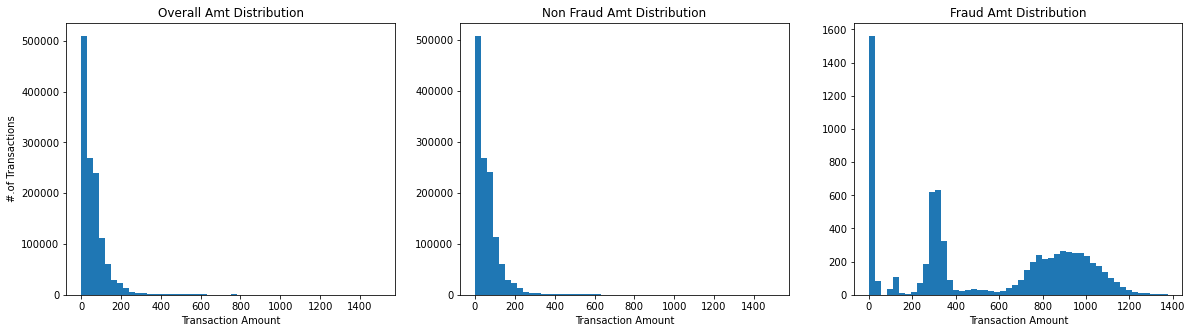

In [47]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(data[data['amt']<=1500]['amt'], bins=50)
ax[1].hist(data[(data['is_fraud']==0) & (data['amt']<=1500)]['amt'], bins=50)
ax[2].hist(data[(data['is_fraud']==1) & (data['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

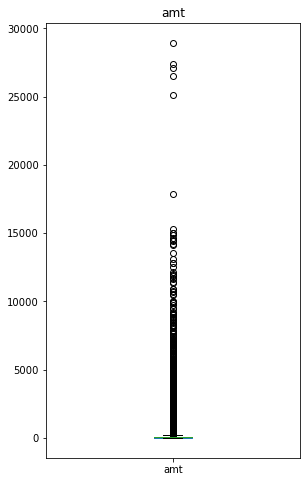

In [48]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    data[col].plot.box()
    plt.title(col)
plt.show()

In [49]:
##timeline plots

In [50]:
## Year Month vs Number of Transactions
data_timeline = data.groupby(data['year_month'])[['trans_num','cc_num']].nunique().reset_index()
data_timeline.columns = ['year_month','num_of_transactions','customers']
data_timeline

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


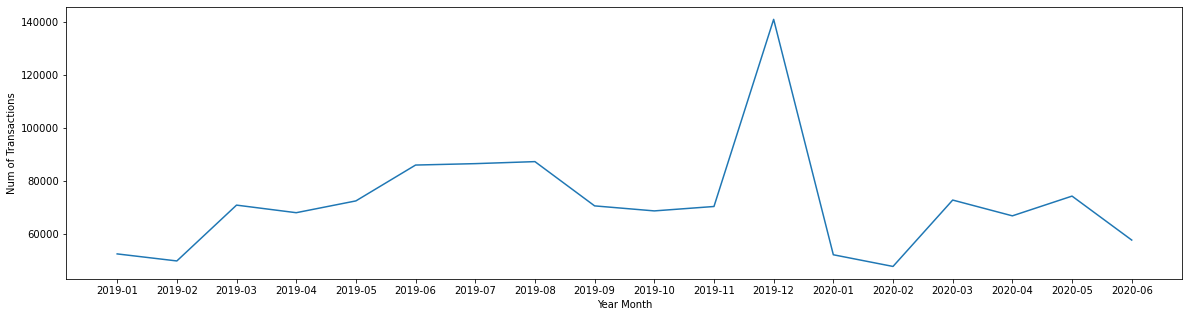

In [51]:
x = np.arange(0,len(data_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,data_timeline['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(data_timeline['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

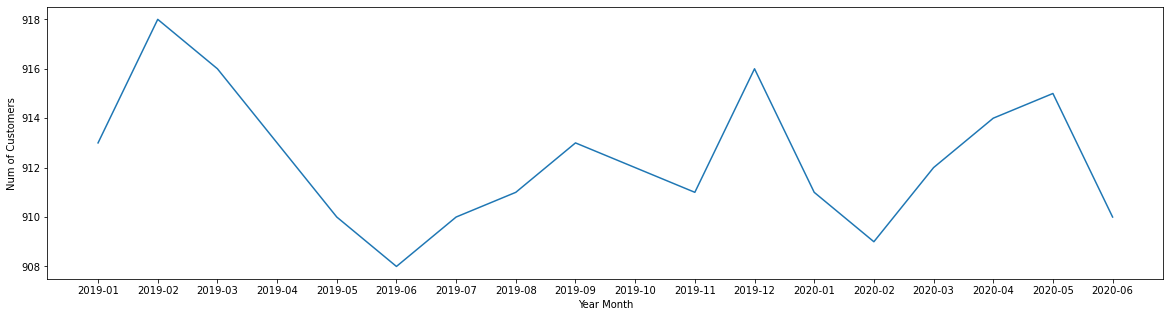

In [52]:
##Year Month vs Number of Customers Done the Transactions
x = np.arange(0,len(data_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,data_timeline['customers'])
ax.set_xticks(x)
ax.set_xticklabels(data_timeline['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [53]:
## fraud transactions analysis 
df_fraud_transactions = data[data['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


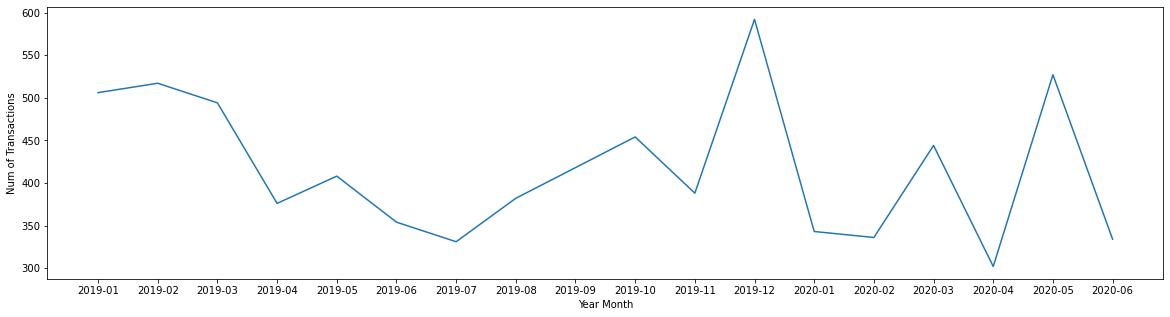

In [54]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()


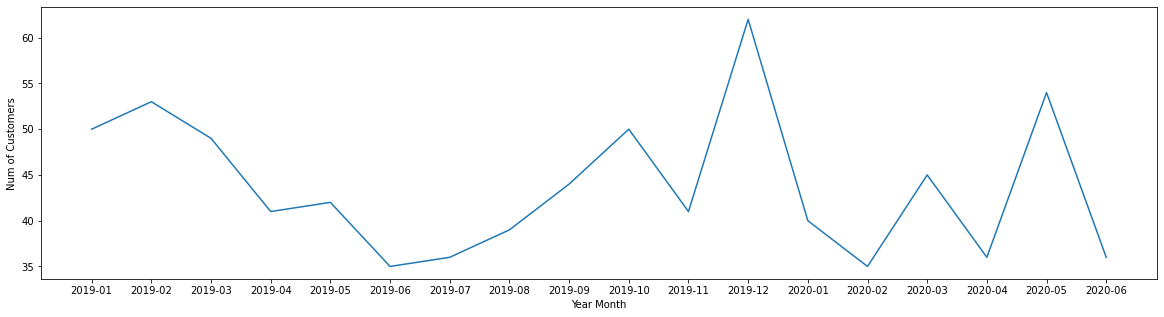

In [55]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [226]:
##gender

In [56]:
df_gender = data[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,0,586812,45.255133
1,1,709863,54.744867


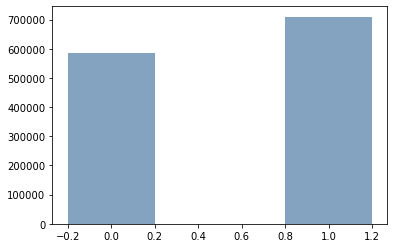

In [58]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [59]:
df_fraud_gender = data[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,0,0,583041,586812,99.357375
1,0,1,3771,586812,0.642625
2,1,0,706128,709863,99.473842
3,1,1,3735,709863,0.526158


In [62]:
## category analysis
df_category = data[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,131659,10.153585
4,grocery_pos,123638,9.535003
6,home,123115,9.494669
12,shopping_pos,116672,8.997783
7,kids_pets,113035,8.717296
11,shopping_net,97543,7.522548
0,entertainment,94014,7.250390
1,food_dining,91461,7.053502
10,personal_care,90758,6.999287
5,health_fitness,85879,6.623017


In [63]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

,index,Category,category_count,percent
0,2,gas_transport,131659,10.153585
1,4,grocery_pos,123638,9.535003
2,6,home,123115,9.494669
3,12,shopping_pos,116672,8.997783
4,7,kids_pets,113035,8.717296
5,11,shopping_net,97543,7.522548
6,0,entertainment,94014,7.250390
7,1,food_dining,91461,7.053502
8,10,personal_care,90758,6.999287
9,5,health_fitness,85879,6.623017


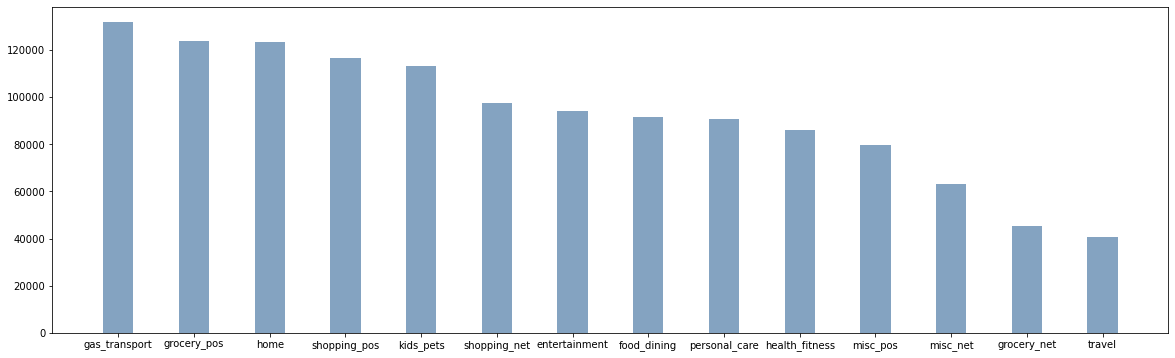

In [64]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [65]:
df_fraud_category = data[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

,Category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,131041,131659,10.153585,99.530606
5,gas_transport,1,618,131659,10.153585,0.469394
8,grocery_pos,0,121895,123638,9.535003,98.590239
9,grocery_pos,1,1743,123638,9.535003,1.409761
13,home,1,198,123115,9.494669,0.160825
12,home,0,122917,123115,9.494669,99.839175
25,shopping_pos,1,843,116672,8.997783,0.722538
24,shopping_pos,0,115829,116672,8.997783,99.277462
14,kids_pets,0,112796,113035,8.717296,99.788561
15,kids_pets,1,239,113035,8.717296,0.211439


In [66]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,133,85879,6.623017,0.154869
13,home,1,198,123115,9.494669,0.160825
3,food_dining,1,151,91461,7.053502,0.165098
15,kids_pets,1,239,113035,8.717296,0.211439
21,personal_care,1,220,90758,6.999287,0.242403
1,entertainment,1,233,94014,7.250390,0.247835
27,travel,1,116,40507,3.123913,0.286370
7,grocery_net,1,134,45452,3.505273,0.294817
19,misc_pos,1,250,79655,6.143020,0.313853
5,gas_transport,1,618,131659,10.153585,0.469394


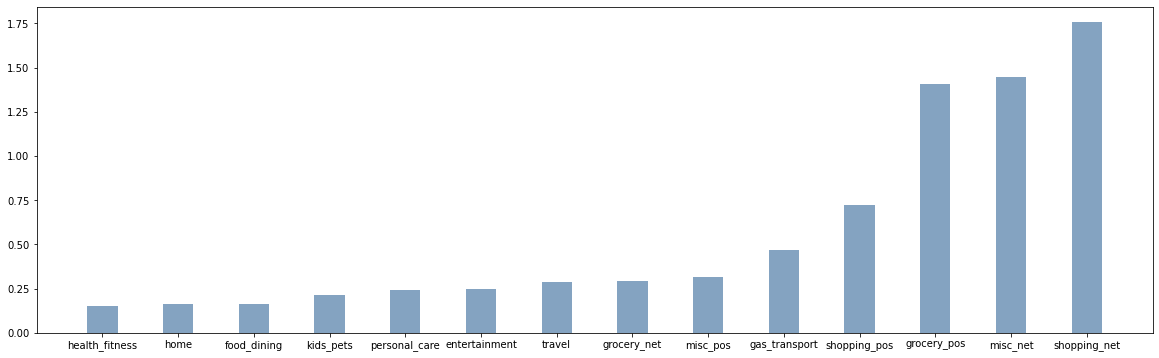

In [67]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [68]:
#merchant
data.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                       0.003396
fraud_Cormier LLC                       0.002814
fraud_Schumm PLC                        0.002803
fraud_Kuhn LLC                          0.002707
fraud_Boyer PLC                         0.002694
                                          ...   
fraud_Douglas, DuBuque and McKenzie     0.000598
fraud_Treutel-King                      0.000598
fraud_Medhurst, Labadie and Gottlieb    0.000585
fraud_Reichert-Weissnat                 0.000581
fraud_Hahn, Douglas and Schowalter      0.000561
Name: merchant, Length: 693, dtype: float64

In [69]:
df_merchant = data[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,4403,0.339561
105,fraud_Cormier LLC,3649,0.281412
571,fraud_Schumm PLC,3634,0.280255
349,fraud_Kuhn LLC,3510,0.270692
70,fraud_Boyer PLC,3493,0.269381
...,...,...,...
633,fraud_Treutel-King,775,0.059768
143,"fraud_Douglas, DuBuque and McKenzie",775,0.059768
423,"fraud_Medhurst, Labadie and Gottlieb",759,0.058534
505,fraud_Reichert-Weissnat,753,0.058072


In [70]:
df_fraud_merchant = data[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
672,fraud_Kozey-Boehm,1,48,1866,0.143907,2.572347
489,"fraud_Herman, Treutel and Dickens",1,33,1300,0.100256,2.538462
606,fraud_Kerluke-Abshire,1,41,1838,0.141747,2.230686
159,fraud_Brown PLC,1,26,1176,0.090694,2.210884
400,fraud_Goyette Inc,1,42,1943,0.149845,2.161606
...,...,...,...,...,...,...
91,fraud_Berge-Hills,1,1,2284,0.176143,0.043783
1106,fraud_Schmidt-Larkin,1,1,2381,0.183623,0.041999
973,"fraud_Prosacco, Kreiger and Kovacek",1,1,2440,0.188174,0.040984
83,fraud_Beier and Sons,1,1,2473,0.190719,0.040437


In [71]:
##One Hot-Encoding
category_onehot = pd.get_dummies(data.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(data.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(data.day_of_week, prefix='week',drop_first=True)
df1 = pd.concat([data, category_onehot,gender_onehot,day_of_week_onehot], axis=1)
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_shopping_net,category_shopping_pos,category_travel,gender_1,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,1,561 Perry Cove,...,0,0,0,1,0,0,0,0,1,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,...,0,0,0,1,0,0,0,0,1,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,0,594 White Dale Suite 530,...,0,0,0,0,0,0,0,0,1,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,0,9443 Cynthia Court Apt. 038,...,0,0,0,0,0,0,0,0,1,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,0,408 Bradley Rest,...,0,0,0,0,0,0,0,0,1,0


In [72]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [73]:
data['dist'] = haversine(data['lat'], data['long'], data['merch_lat'], data['merch_long'])
data['dist'].describe()

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: dist, dtype: float64

In [74]:
data.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                            int64
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_hour                        int64
day_of_week                      object


C:\Users\dhrit\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dhrit\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


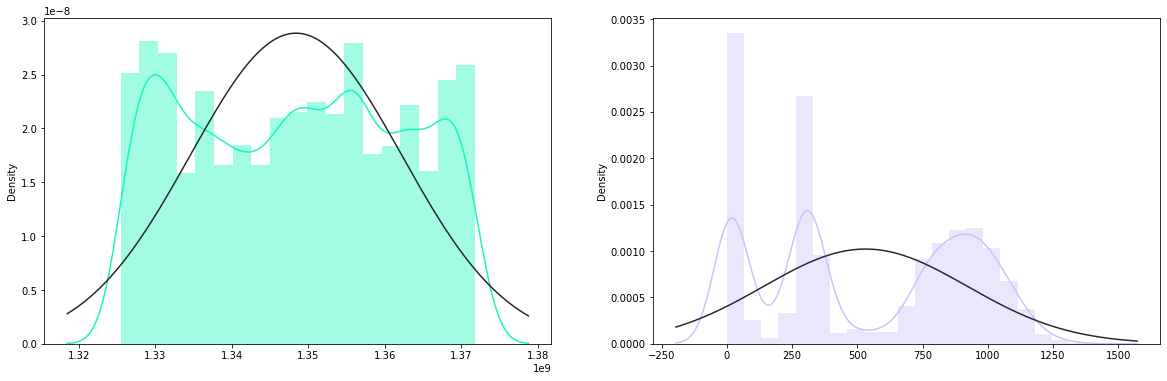

In [81]:
from scipy.stats import norm
normal_distributed_df = pd.concat([fraud_data, non_fraud_data]).sample(frac=1, random_state=42)

# Distribution plot
# Distribution plot
f, (axes2,axes3) = plt.subplots(1,2, figsize=(20, 6))

uni_fraud_dist = normal_distributed_df['unix_time'].loc[normal_distributed_df['is_fraud'] == 1].values
sns.distplot(uni_fraud_dist,ax=axes2, fit=norm, color='#16F9BB')
ax2.set_title('Unix Time Distribution \n (Fraud Transactions)', fontsize=14)


amt_fraud_dist = normal_distributed_df['amt'].loc[normal_distributed_df['is_fraud'] == 1].values
sns.distplot(amt_fraud_dist,ax=axes3, fit=norm, color='#CCC3F9')
ax3.set_title('Amount Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()